In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn
import time
from collections import Counter
from numpy import array
from matplotlib import pyplot
from numpy import where

# <font color=black>Label Mapping</font>

In [3]:
import pandas as pd 
df = pd.read_csv('dataset_cleaned.csv')
dataset = df.copy()

In [4]:
# distribution of dataset
dataset['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

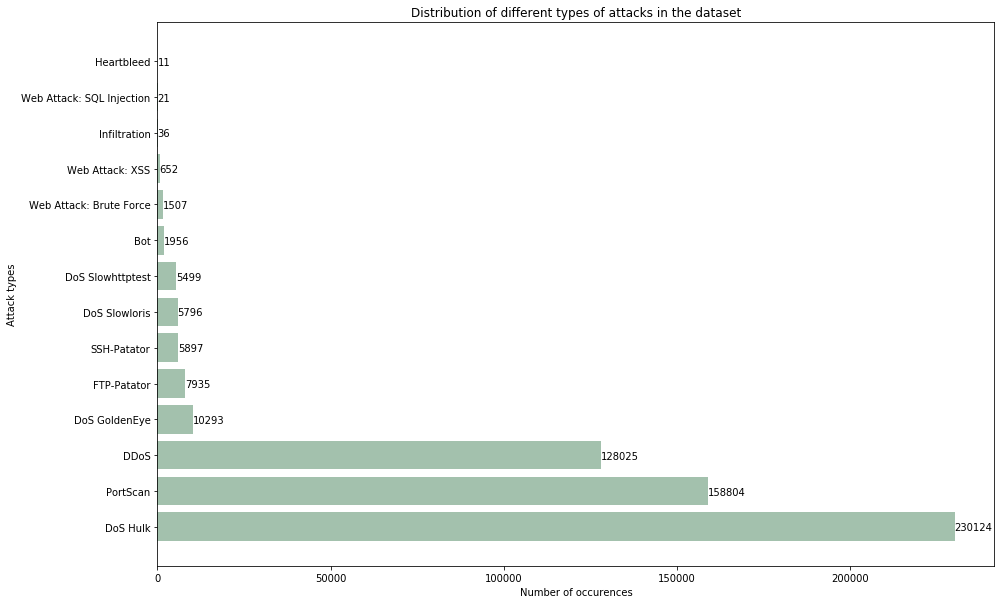

In [5]:
#visualization of data set according to labels
plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
y_pos = np.arange(len(attack)) 
amount = dataset['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [6]:
#eliminating of minority labels
dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [7]:
#editing label names
dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'XSS'

In [8]:
# create attack column, containing binary labels
dataset['Attack'] = np.where(dataset['Label'] == 'BENIGN', 0, 1)

In [9]:
# proposed groupings
attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}
# create grouped label column
dataset['Label_Category'] = dataset['Label'].map(lambda x: attack_group[x])
dataset['Label_Category'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: Label_Category, dtype: int64

In [10]:
# proposed groupings
attack_group = {'benign': 0, 
                'dos': 1,
                'probe': 2, 
                'ddos': 3, 
                'brute_force': 4,
                'botnet': 5,
                'web_attack': 6}
# create grouped label column
dataset['Label_Category_Num'] = dataset['Label_Category'].map(lambda x: attack_group[x])
dataset['Label_Category_Num'].value_counts()

0    2271320
1     251712
2     158804
3     128025
4      13832
6       2159
5       1956
Name: Label_Category_Num, dtype: int64

pandas.core.series.Series

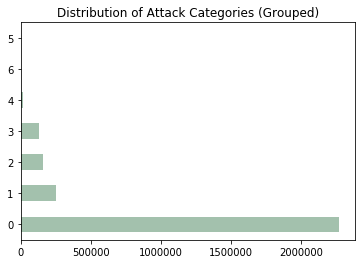

In [11]:
#visualization of data set according to label categories
train_attacks = dataset['Label_Category_Num'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')
type(train_attacks)

In [12]:
#importing dataset to folder
import csv
dataset.to_csv("dataset_labelled.csv", index=False)